# Dogs Vs Cats Image Classification


In [51]:
# Import necessary modules
import os
import zipfile
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm, metrics
import random
from google.colab import drive
import matplotlib.pyplot as plt
import gc

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Define paths to the zip files
train_zip_path = '/content/drive/My Drive/dogs-vs-cats/train.zip'
test_zip_path = '/content/drive/My Drive/dogs-vs-cats/test1.zip'

In [54]:
# Extract the train.zip
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train')

# Extract the test1.zip
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/test1')

In [55]:
# Verify extraction
print(f"Number of files in train directory: {len(os.listdir('/content/train/train'))}")
print(f"Number of files in test directory: {len(os.listdir('/content/test1/test1'))}")

Number of files in train directory: 25000
Number of files in test directory: 12500


In [56]:
# Prepare the dataset
TRAIN_DIR_PATH = '/content/train/train'
TEST_DIR_PATH = '/content/test1/test1'

In [57]:
train_files = os.listdir(TRAIN_DIR_PATH)
targets = []
full_paths = []

In [58]:
for file_name in train_files:
    target = file_name.split(".")[0]  # target name (cat or dog)
    full_path = os.path.join(TRAIN_DIR_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

In [9]:
# Create a DataFrame
dataset = pd.DataFrame({'image_path': full_paths, 'target': targets})

In [10]:
# Function to preprocess images
def preprocess_image(image_path, target_size=(100, 100)):
    img = imread(image_path)
    img = resize(img, target_size)
    img_flat = img.flatten()
    return img_flat

In [11]:
# Generator to yield batches of images
def image_generator(image_paths, targets, batch_size=32):
    num_samples = len(image_paths)
    while True:  # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_paths = image_paths[offset:offset+batch_size]
            batch_targets = targets[offset:offset+batch_size]

            images = [preprocess_image(path) for path in batch_paths]
            X = np.array(images)
            y = le.transform(batch_targets)

            yield X, y

In [12]:
# Encode labels to integers
le = LabelEncoder()
le.fit(dataset['target'])

LabelEncoder()

In [13]:
# Split the dataset
train_data, test_data = train_test_split(dataset, test_size=0.2, stratify=dataset['target'], random_state=42)

In [14]:
# Apply PCA to a subset of data to fit the model
subset_data = train_data.sample(1000, random_state=42)
X_subset = np.array([preprocess_image(image_path) for image_path in subset_data['image_path']])
y_subset = le.transform(subset_data['target'])

In [15]:
pca = PCA(n_components=100)
X_subset_pca = pca.fit_transform(X_subset)

In [16]:
# Function to apply PCA to a batch of data
def apply_pca_batch(X_batch):
    return pca.transform(X_batch)

In [17]:
# Define batch size
batch_size = 32

In [18]:
# Create generators for training and testing
train_generator = image_generator(train_data['image_path'], train_data['target'], batch_size=batch_size)
test_generator = image_generator(test_data['image_path'], test_data['target'], batch_size=batch_size)


In [19]:
# Train SVM model in batches
clf = svm.SVC(kernel='rbf', random_state=42)

In [20]:
# Fit SVM in batches
num_batches = len(train_data) // batch_size
for i in range(num_batches):
    X_batch, y_batch = next(train_generator)
    X_batch_pca = apply_pca_batch(X_batch)
    clf.fit(X_batch_pca, y_batch)
    print(f"Processed batch {i+1}/{num_batches}")

Processed batch 1/625
Processed batch 2/625
Processed batch 3/625
Processed batch 4/625
Processed batch 5/625
Processed batch 6/625
Processed batch 7/625
Processed batch 8/625
Processed batch 9/625
Processed batch 10/625
Processed batch 11/625
Processed batch 12/625
Processed batch 13/625
Processed batch 14/625
Processed batch 15/625
Processed batch 16/625
Processed batch 17/625
Processed batch 18/625
Processed batch 19/625
Processed batch 20/625
Processed batch 21/625
Processed batch 22/625
Processed batch 23/625
Processed batch 24/625
Processed batch 25/625
Processed batch 26/625
Processed batch 27/625
Processed batch 28/625
Processed batch 29/625
Processed batch 30/625
Processed batch 31/625
Processed batch 32/625
Processed batch 33/625
Processed batch 34/625
Processed batch 35/625
Processed batch 36/625
Processed batch 37/625
Processed batch 38/625
Processed batch 39/625
Processed batch 40/625
Processed batch 41/625
Processed batch 42/625
Processed batch 43/625
Processed batch 44/6

In [21]:
# Validate the model in batches
num_batches_test = len(test_data) // batch_size
y_test_true = []
y_test_pred = []

for i in range(num_batches_test):
    X_batch, y_batch = next(test_generator)
    X_batch_pca = apply_pca_batch(X_batch)
    y_pred_batch = clf.predict(X_batch_pca)
    y_test_true.extend(y_batch)
    y_test_pred.extend(y_pred_batch)
    print(f"Processed test batch {i+1}/{num_batches_test}")

Processed test batch 1/156
Processed test batch 2/156
Processed test batch 3/156
Processed test batch 4/156
Processed test batch 5/156
Processed test batch 6/156
Processed test batch 7/156
Processed test batch 8/156
Processed test batch 9/156
Processed test batch 10/156
Processed test batch 11/156
Processed test batch 12/156
Processed test batch 13/156
Processed test batch 14/156
Processed test batch 15/156
Processed test batch 16/156
Processed test batch 17/156
Processed test batch 18/156
Processed test batch 19/156
Processed test batch 20/156
Processed test batch 21/156
Processed test batch 22/156
Processed test batch 23/156
Processed test batch 24/156
Processed test batch 25/156
Processed test batch 26/156
Processed test batch 27/156
Processed test batch 28/156
Processed test batch 29/156
Processed test batch 30/156
Processed test batch 31/156
Processed test batch 32/156
Processed test batch 33/156
Processed test batch 34/156
Processed test batch 35/156
Processed test batch 36/156
P

In [59]:
# Calculate accuracy
test_accuracy = metrics.accuracy_score(y_test_true, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 56.89%


In [60]:
# Clear memory
gc.collect()

85

In [61]:
# Function to randomly classify multiple images from the dataset
def randomly_classify_images(dataset, num_images=3):
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        random_index = random.randint(0, len(dataset) - 1)
        random_image_path = dataset.iloc[random_index]['image_path']
        img_flat = preprocess_image(random_image_path)
        img_pca = pca.transform([img_flat])
        prediction = clf.predict(img_pca)
        label = le.inverse_transform(prediction)[0]

        # Display the image
        img = imread(random_image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f'Predicted: {label}')
        plt.axis('off')

    plt.show()

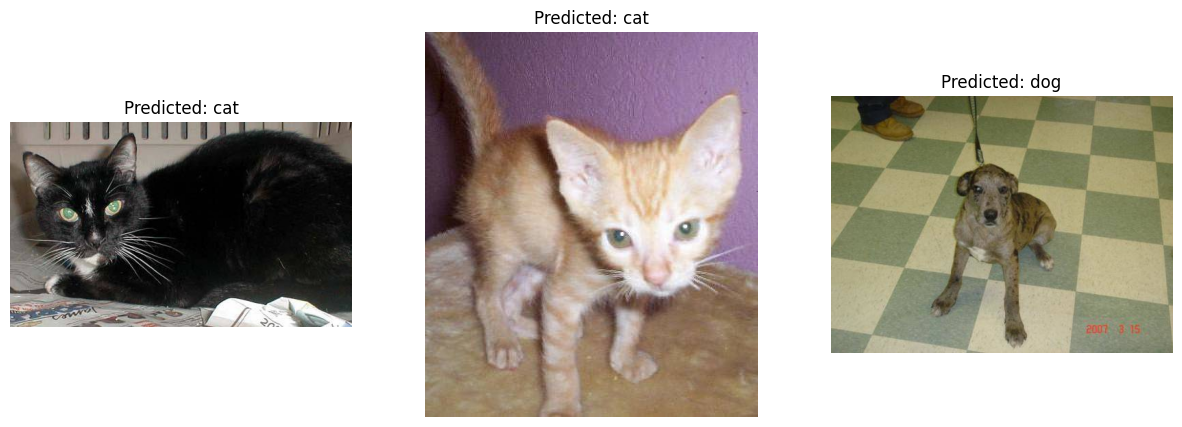

In [67]:
# Example usage
randomly_classify_images(dataset, num_images=3)

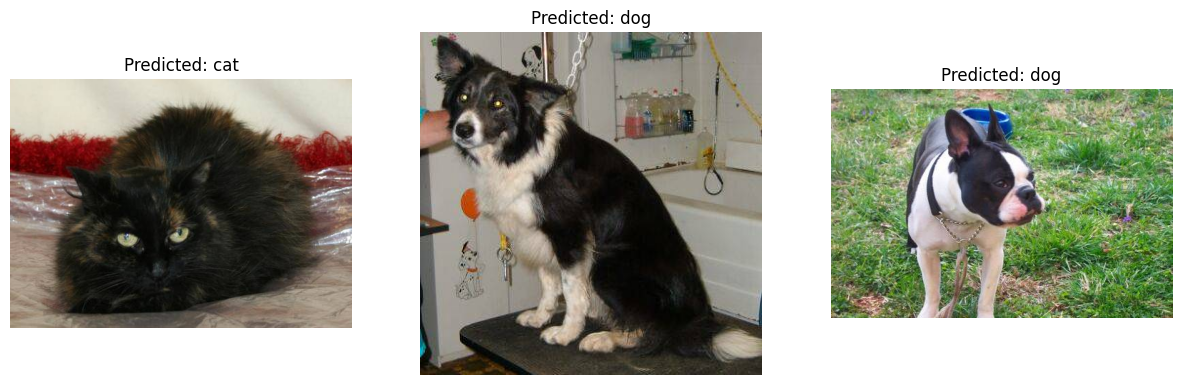

In [71]:
# Example usage
randomly_classify_images(dataset, num_images=3)

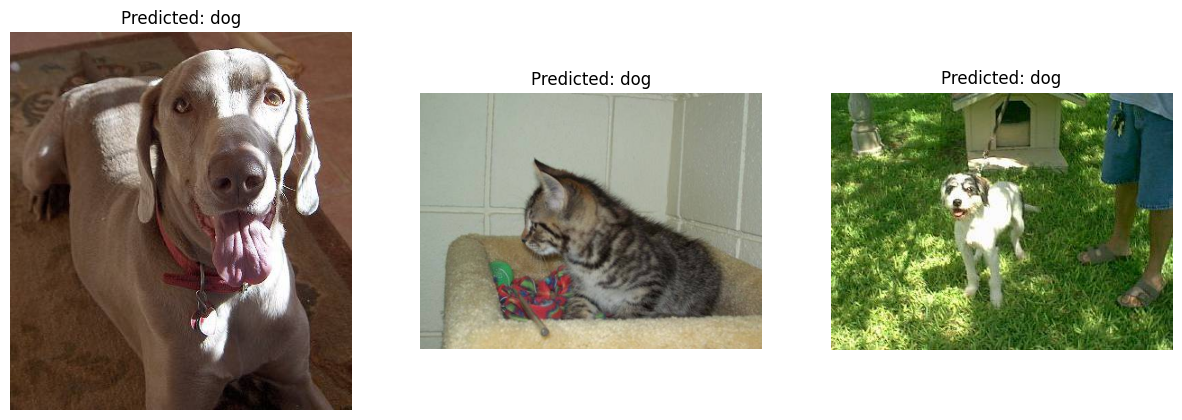

In [63]:
# Example usage
randomly_classify_images(dataset, num_images=3)